In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
#!pip install yahooquery
from yahooquery import Ticker


In [3]:
import pandas_datareader as pdr

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#from pandas.io.data import DataReader?

In [6]:
from datetime import datetime

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [69]:
for stock in tech_list:
    globals()[stock] = t = Ticker(stock).history(period="120d",  interval = "1d")#pdr.DataReader(stock,'yahoo',start,end)

In [10]:
AAPL.head()

open        high         low       close    volume  \
symbol date                                                                   
AAPL   2022-07-12  145.759995  148.449997  145.050003  145.860001  77588800   
       2022-07-13  142.990005  146.449997  142.119995  145.490005  71185600   
       2022-07-14  144.080002  148.949997  143.250000  148.470001  78140700   
       2022-07-15  149.779999  150.860001  148.199997  150.169998  76259900   
       2022-07-18  150.740005  151.570007  146.699997  147.070007  81420900   

                     adjclose  dividends  
symbol date                               
AAPL   2022-07-12  145.416443        0.0  
       2022-07-13  145.047577        0.0  
       2022-07-14  148.018524        0.0  
       2022-07-15  149.713333        0.0  
       2022-07-18  146.622787        0.0

In [11]:
AAPL.describe()

,open,high,low,close,volume,adjclose,dividends
count,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,150.473167,152.444959,148.444792,150.474833,8.145220e+07,150.267930,0.003833
std,10.557266,10.453958,10.837233,10.736959,2.325778e+07,10.649246,0.029568
min,127.989998,129.975006,125.870003,126.040001,2.905331e+07,126.040001,0.000000
25%,142.827496,145.810001,140.844994,143.155006,6.797895e+07,143.091896,0.000000
50%,149.220001,151.290001,147.359993,149.939995,7.787915e+07,149.706665,0.000000
75%,156.512501,157.885006,153.630001,156.167503,8.829522e+07,155.854591,0.000000
max,173.750000,176.149994,173.119995,174.550003,1.647624e+08,174.260925,0.230000


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 120 entries, ('AAPL', datetime.date(2022, 7, 12)) to ('AAPL', datetime.date(2022, 12, 29))
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       120 non-null    float64
 1   high       120 non-null    float64
 2   low        120 non-null    float64
 3   close      120 non-null    float64
 4   volume     120 non-null    int64  
 5   adjclose   120 non-null    float64
 6   dividends  120 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 12.0+ KB


In [13]:
AAPL.head()

open        high         low       close    volume  \
symbol date                                                                   
AAPL   2022-07-12  145.759995  148.449997  145.050003  145.860001  77588800   
       2022-07-13  142.990005  146.449997  142.119995  145.490005  71185600   
       2022-07-14  144.080002  148.949997  143.250000  148.470001  78140700   
       2022-07-15  149.779999  150.860001  148.199997  150.169998  76259900   
       2022-07-18  150.740005  151.570007  146.699997  147.070007  81420900   

                     adjclose  dividends  
symbol date                               
AAPL   2022-07-12  145.416443        0.0  
       2022-07-13  145.047577        0.0  
       2022-07-14  148.018524        0.0  
       2022-07-15  149.713333        0.0  
       2022-07-18  146.622787        0.0

In [14]:
AAPL.index = AAPL.index.droplevel()

<AxesSubplot: xlabel='date'>

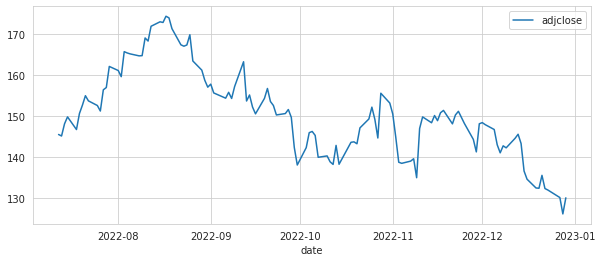

In [47]:
AAPL.adjclose.plot(legend=True,figsize=(10,4))

<AxesSubplot: xlabel='date'>

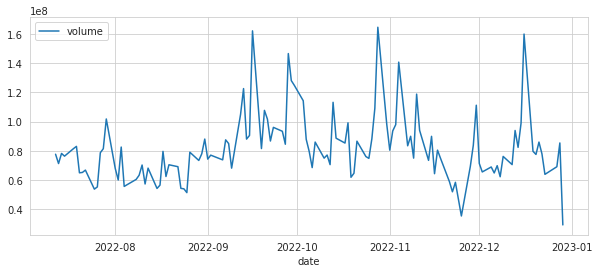

In [16]:
AAPL.volume.plot(legend=True,figsize=(10,4))

Simple Moving Average:
(Day1 + Day2+ Day3 +... Dayn)/n

There is also an exponencial moving average that is more sensible to new data

Common moving average lengths are: 10,20 50, 100, 200

In [17]:
def calculate_moving_average(length,values_list):
    return values_list.rolling(window=length).mean()

<AxesSubplot: xlabel='date'>

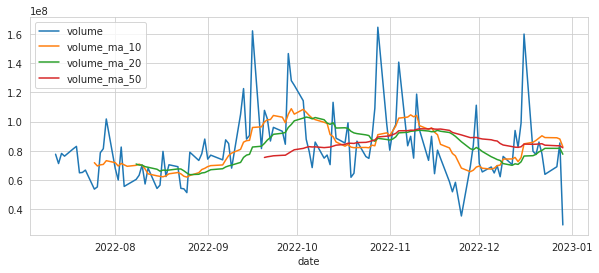

In [18]:

AAPL['volume_ma_10'] = calculate_moving_average(10,AAPL['volume'])
AAPL['volume_ma_20'] = calculate_moving_average(20,AAPL['volume'])
AAPL['volume_ma_50'] = calculate_moving_average(50,AAPL['volume'])
AAPL[['volume','volume_ma_10','volume_ma_20','volume_ma_50']].plot(legend=True,figsize=(10,4))

In [19]:
AAPL.head()

,open,high,low,close,volume,adjclose,dividends,volume_ma_10,volume_ma_20,volume_ma_50
date,,,,,,,,,,
2022-07-12,145.759995,148.449997,145.050003,145.860001,77588800,145.416443,0.0,NaN,NaN,NaN
2022-07-13,142.990005,146.449997,142.119995,145.490005,71185600,145.047577,0.0,NaN,NaN,NaN
2022-07-14,144.080002,148.949997,143.250000,148.470001,78140700,148.018524,0.0,NaN,NaN,NaN
2022-07-15,149.779999,150.860001,148.199997,150.169998,76259900,149.713333,0.0,NaN,NaN,NaN
2022-07-18,150.740005,151.570007,146.699997,147.070007,81420900,146.622787,0.0,NaN,NaN,NaN


<AxesSubplot: xlabel='date'>

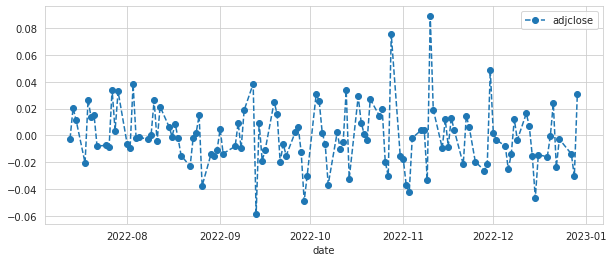

In [20]:
AAPL.adjclose.pct_change().plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/tmp/ipykernel_13248/2677579364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL.adjclose.pct_change(),bins=100)


<AxesSubplot: xlabel='adjclose', ylabel='Density'>

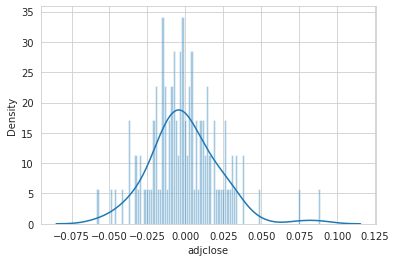

In [21]:
sns.distplot(AAPL.adjclose.pct_change(),bins=100)

<AxesSubplot: >

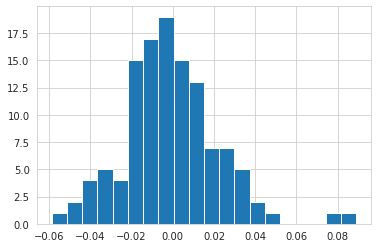

In [22]:
AAPL.adjclose.pct_change().hist(bins=20)

In [23]:
len(AAPL)

120

In [70]:
df = DataFrame()#{'AAPL':AAPL['close'],'GOOG':GOOG['close']})

AAPL.index = AAPL.index.droplevel()
GOOG.index = GOOG.index.droplevel()
MSFT.index = MSFT.index.droplevel()
AMZN.index = AMZN.index.droplevel()

df['AAPL'] = AAPL['adjclose']
df['GOOG'] = GOOG['adjclose']
df['MSFT'] = MSFT['adjclose']
df['AMZN'] = AMZN['adjclose']
#df = pd.merge([AAPL,GOOG,MSFT,AMZN])

In [71]:
df = df.pct_change()


In [72]:
df.tail(50)

,AAPL,GOOG,MSFT,AMZN
date,,,,
2022-10-19,0.000765,-0.010849,-0.008470,-0.011086
2022-10-20,-0.003267,0.002393,-0.001395,0.001564
2022-10-21,0.027059,0.009450,0.025281,0.035315
2022-10-24,0.014803,0.014683,0.021188,0.004190
2022-10-25,0.019338,0.019035,0.013792,0.006510
2022-10-26,-0.019627,-0.096350,-0.077156,-0.040962
2022-10-27,-0.030465,-0.023413,-0.019756,-0.040636
2022-10-28,0.075553,0.042981,0.040220,-0.068042
2022-10-31,-0.015410,-0.019880,-0.015856,-0.009380


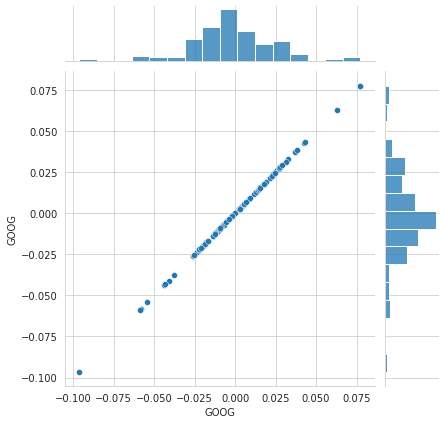

In [73]:
sns.jointplot(df,x='GOOG',y='GOOG',kind='scatter')

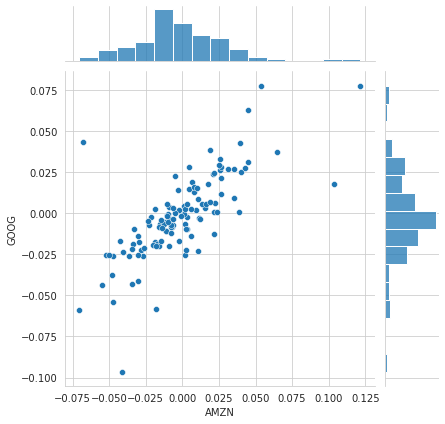

In [74]:
sns.jointplot(df,x='AMZN',y='GOOG',kind='scatter')

In [75]:
from scipy.stats import stats

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2022-07-12 to 2022-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    119 non-null    float64
 1   GOOG    119 non-null    float64
 2   MSFT    119 non-null    float64
 3   AMZN    119 non-null    float64
dtypes: float64(4)
memory usage: 8.8+ KB


In [83]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

/tmp/ipykernel_13248/361904106.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.pearsonr(df['AMZN'], df['AAPL'])


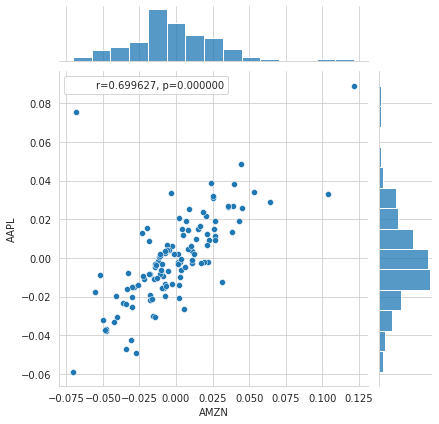

In [84]:
j = sns.jointplot(df,x='AMZN',y='AAPL',kind='scatter')
r, p = stats.pearsonr(df['AMZN'], df['AAPL'])
phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])



In [85]:
r,p

(0.6996270261084281, 8.653103808165916e-19)

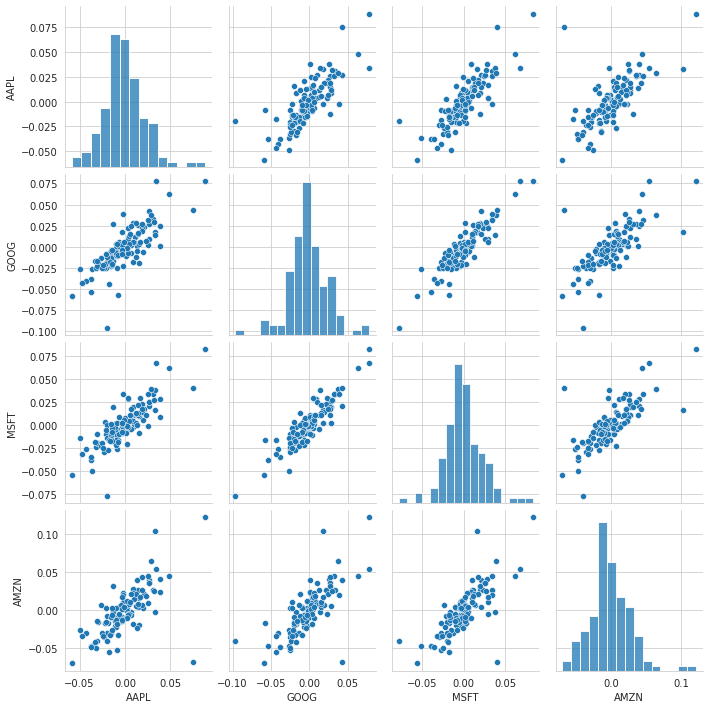

In [86]:
sns.pairplot(df.dropna())

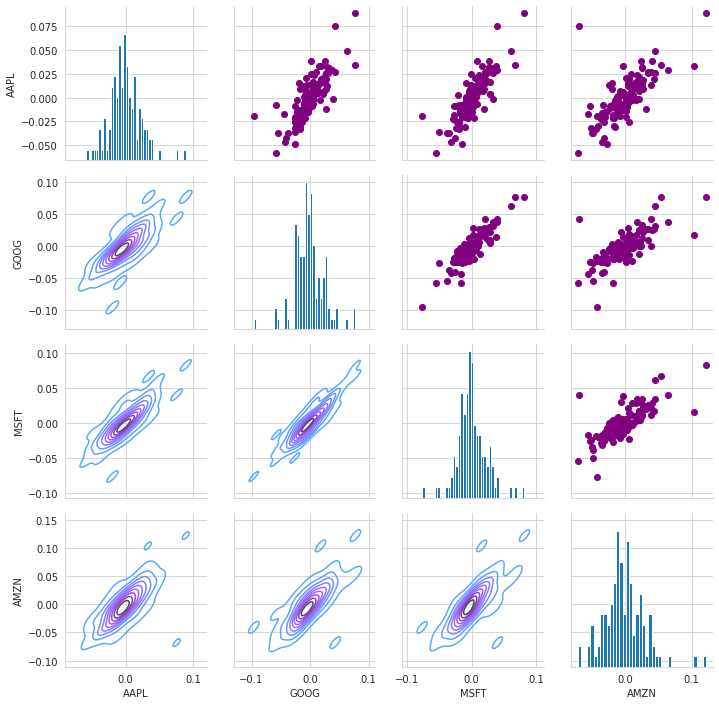

In [87]:
fig = sns.PairGrid(df.dropna())
fig.map_upper(plt.scatter,color='purple')
fig.map_lower(sns.kdeplot,cmap='cool_d')
fig.map_diag(plt.hist,bins=40)


<AxesSubplot: >

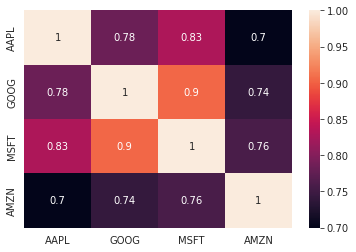

In [88]:
sns.heatmap(df.dropna().corr(),annot=True)

In [63]:
df

,AAPL,GOOG,MSFT,AMZN
date,,,,
2022-07-12,145.416443,114.849503,252.421326,109.220001
2022-07-13,145.047577,112.186996,251.476013,110.400002
2022-07-14,148.018509,111.440002,252.829330,110.629997
2022-07-15,149.713348,112.766998,255.456314,113.550003
2022-07-18,146.622772,109.910004,252.998474,113.760002
...,...,...,...,...
2022-12-22,132.229996,88.260002,238.190002,83.790001
2022-12-23,131.860001,89.809998,238.729996,85.250000
2022-12-27,130.029999,87.930000,236.960007,83.040001


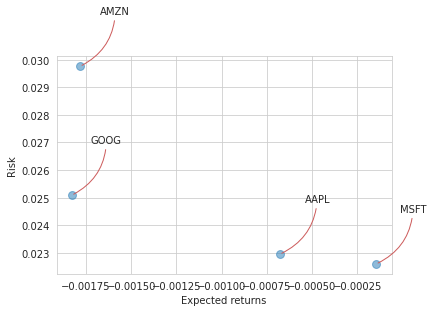

In [89]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = df.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.ylim([9,25])
#plt.xlim([100,290])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='indianred'))

In [90]:
df['AAPL'].quantile(0.05)

-0.036777357139324104

^ This means that 95% of the time our worst daily loss won't exceed 3.7%

In [93]:
df['MSFT'].quantile(0.05)


-0.02961156321124986

In [94]:
df['GOOG'].quantile(0.05)


-0.04131697291779327

In [95]:
df['AMZN'].quantile(0.05)

-0.047767560063888805

In [96]:
days = 365
dt = 1/days
mu = df.mean()['MSFT']
sigma = df.std()['MSFT']

In [6]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

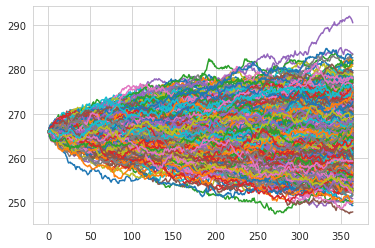

In [100]:
for _ in range(1000):
    plt.plot(stock_monte_carlo(MSFT['open'][0],days,mu,sigma))

In [105]:
simulations = []
for _ in range(10000):
    simulations.append(stock_monte_carlo(MSFT['open'][0],days,mu,sigma)[-1])

In [106]:
q = np.percentile(simulations,1)

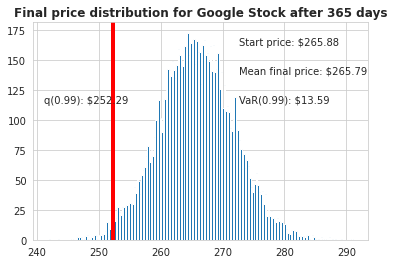

In [108]:
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %MSFT['open'][0])
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % np.mean(simulations))

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (MSFT['open'][0] - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

<function pandas.util._tester.test(extra_args: 'list[str] | None' = None)>